# DATA SCIENCE INTERNSHIP @ OASIS INFOBYTE SIP (OIBSIP)

### AUTHOR : PARVEJ ALAM M. ANSARI

# TASK 5 : Sales Prediction Using Python

### The dataset is available at Kaggle : https://www.kaggle.com/datasets/ashydv/advertising-dataset

### Context:
- Use the advertising dataset given in ISLR and analyse the relationship between 'TV', 'Radio', 'Newspaper' and 'sales' using a simple linear regression model.

In [1]:
from IPython.display import Image
Image(url='https://raw.githubusercontent.com/Masterx-AI/Project_Ad_Budget_Estimation_/main/0-ad1%20(1).jpg', height=100, width=400)

## 1. Import Required Libraries:

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [3]:
# Load Dataset:
df = pd.read_csv('advertising.xls')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 2. Exploratory Data Analysis (EDA):

In [4]:
# Checking Shape of dataframe:
df.shape

(200, 5)

In [5]:
# Checking columns name:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
# Checking data type of columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
# Checking for null values:
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
# Checking duplicates in rows:
df.duplicated().sum()

0

In [9]:
# Checking descriptive statistics:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


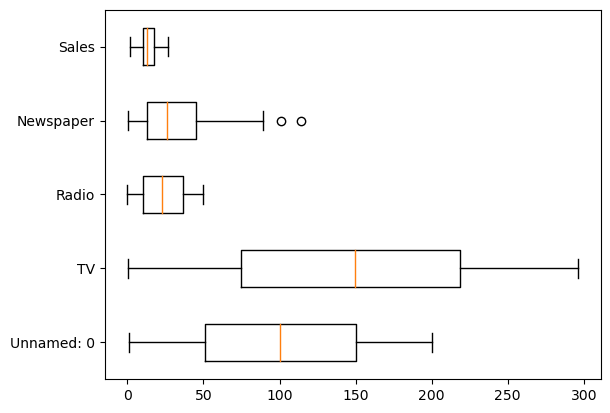

In [10]:
# Checking for outliers:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

from the above boxplot it is clear that Newspaper column has the outliers but as per problem statement these outliers may play very important role for the prediction of future sales so i decide not to remove it.

In [11]:
# Droping useless columns:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

## 3. Separating Input Features and Target Column:

In [12]:
x = df.iloc[:,:-1]
x.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [13]:
y = df.iloc[:,-1:]
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


## 4. Train-Test-Split: 

In [14]:
xtrain, xtest, ytrain, ytest  = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
print(xtrain.shape)
print(ytrain.shape)

(140, 3)
(140, 1)


In [16]:
print(xtest.shape)
print(ytest.shape)

(60, 3)
(60, 1)


## 5. Linear Regression Algorithm:

In [17]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
model = LinearRegression()

In [18]:
model.fit(xtrain,ytrain)

LinearRegression()

In [19]:
ypred = model.predict(xtest)
ypred[10]

array([9.01443026])

In [20]:
model.score(xtrain,ytrain)*100

90.55159502227752

In [21]:
model.score(xtest,ytest)*100

86.09466508230368

## 6. Evaluation of Algorithm:

In [22]:
mean_squared_error(ytest,ypred)

3.79679723671522

In [23]:
mean_absolute_error(ytest,ypred)

1.5116692224549084

In [24]:
r2_score(ytest,ypred)*100

86.09466508230368

In [25]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
rmse

1.9485372043446387

## 7. Hyper-parameter Tuning:

In [26]:
cv = KFold(n_splits=5,shuffle=True, random_state=0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [27]:
scores = cross_val_score(model,x,y,cv=cv,n_jobs=-1)
finalscore = np.mean(scores)
finalscore

0.8910650514774895

In [28]:
param_grid = {'copy_X':[True], 'n_jobs':[-1,1,2,-2], 'positive':[False], 'fit_intercept':[True]}

In [29]:
grid_model=GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_model

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'positive': [False]})

In [30]:
grid_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True], 'fit_intercept': [True],
                         'n_jobs': [-1, 1, 2, -2], 'positive': [False]})

In [31]:
grid_model.estimator

LinearRegression()

In [32]:
grid_model.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__positive': False,
 'estimator': LinearRegression(),
 'n_jobs': -1,
 'param_grid': {'copy_X': [True],
  'n_jobs': [-1, 1, 2, -2],
  'positive': [False],
  'fit_intercept': [True]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [33]:
grid_model.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

In [34]:
grid_model.best_score_

0.8831447829945456

## 8. Ridge Linear Regression:

In [35]:
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1, positive=False)

In [36]:
model.fit(xtrain,ytrain)
model.predict(xtest)
model.score(xtrain,ytrain)
model.score(xtest,ytest)

0.8609466508230368

In [37]:
ridgemodel = Ridge()
ridgemodel

Ridge()

In [38]:
param_ridge={
    'alpha' :[1.0,0.01,2,3,0.05,0.07,0.09,0.1,0.3,0.6,0.9],
    'fit_intercept':[True],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,10000,13000,15000],
    'tol':[0.001,0.004,0.002,0.003],
    'solver':['auto','saga'],
    'positive':[True],
    'random_state':[0]
}

In [39]:
ridge_model = GridSearchCV(ridgemodel, param_grid=param_ridge, cv=5)
ridge_model

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'positive': [True], 'random_state': [0],
                         'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [40]:
ridge_model.fit(xtrain,ytrain)

/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1320 fits failed out of a total of 2640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1320 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py", line 1134, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "/home/ali/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py", line 832, in fit
    raise ValueError(
V

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.01, 2, 3, 0.05, 0.07, 0.09, 0.1, 0.3,
                                   0.6, 0.9],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 10000, 13000, 15000],
                         'positive': [True], 'random_state': [0],
                         'solver': ['auto', 'saga'],
                         'tol': [0.001, 0.004, 0.002, 0.003]})

In [41]:
ridgepred = ridge_model.predict(xtest)

In [42]:
ridge_model.score(xtrain,ytrain)

0.9055159460761083

In [43]:
ridge_model.score(xtest,ytest)

0.8609596041441228

## 9. Lasso Linear Regression:

In [44]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.8651496069722558

In [45]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [46]:
grid_model_lasso=GridSearchCV(lasso, param_grid=lasso_grid_para, n_jobs=-1, cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [47]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [48]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [49]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.8651496069722558

## Concluding Remarks:
- By analysing all three linear algorithms, namely Linear Regression, Ridge Regression and Lasso Regression, it is concluded that Linear Regression algorithm performs better than Ridge and Lasso Algorithms.
- Further more, after hyperparameter tuning Linear regression algorithm performance is increased from 86 % to almost 88 %
- Ridge and Lasso Algorithms Performs almost same with acccuracy of 86.51 %